**Clustering Hierárquico**

1. Carregue a base `sample_stocks.csv`
2. Normalize os dados
3. Implemente Clustering Hierárquico
4. Plote o dendograma

# Atividade 06: agglomerative clustering

### 1. Carregue a base `sample_stocks.csv`

In [1]:
import pandas as pd

df = pd.read_csv('../data/sample_stocks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   returns        648 non-null    int64  
 1   dividendyield  648 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.2 KB


### 2. Normalize os dados

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfs    = pd.DataFrame(scaler.fit_transform(df),
                      columns=df.columns,
                      index=df.index)

dfs

,returns,dividendyield
0,-1.502468,-1.480951
1,-1.195372,-1.480951
2,-1.246554,-1.480951
3,-0.990640,-1.480951
4,-1.502468,-1.480951
...,...,...
643,-0.325264,0.952255
644,0.135382,0.952255
645,-0.478812,0.952255
646,0.596027,0.952255


### 3. Implemente Clustering Hierárquico

In [4]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(distance_threshold=0, 
                                n_clusters=None,
                                linkage='single')

ac       = model.fit(dfs)
clusters = ac.children_

clusters

array([[   0,    4],
       [  14,  648],
       [  24,  649],
       ...,
       [ 620, 1291],
       [ 626, 1292],
       [ 647, 1293]])

### 4. Plote o dendograma

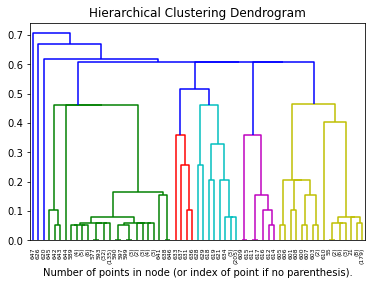

In [5]:
# source: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()